<a href="https://colab.research.google.com/github/THEJASHREE29/FreshGuard-ShelfLife/blob/main/greenpods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification --force


Dataset URL: https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification
License(s): unknown
100% 3.56G/3.58G [00:33<00:00, 249MB/s]
100% 3.58G/3.58G [00:34<00:00, 113MB/s]


In [ ]:
!unzip -qo fruits-fresh-and-rotten-for-classification.zip


In [ ]:
!unzip -l fruits-fresh-and-rotten-for-classification.zip | head -50


Archive:  fruits-fresh-and-rotten-for-classification.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   159597  2019-10-04 10:08   dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 4.59.44 PM.png
   150615  2019-10-04 10:08   dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.01.15 PM.png
   256398  2019-10-04 10:08   dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.01.22 PM.png
   246370  2019-10-04 10:08   dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.01.41 PM.png
    90076  2019-10-04 10:08   dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.02.43 PM.png
   216110  2019-10-04 10:08   dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.03.40 PM.png
    96573  2019-10-04 10:08   dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.04.16 PM.png
    99008  2019-10-04 10:08   dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.04.24 PM.png
   151750  2019-10-04 10:08   dataset/dat

In [ ]:
!mkdir -p fruits_dataset


In [ ]:
!mv dataset/dataset/train fruits_dataset/
!mv dataset/dataset/test fruits_dataset/


In [ ]:
!ls fruits_dataset/train
!ls fruits_dataset/test


freshapples  freshoranges  rottenbanana
freshbanana  rottenapples  rottenoranges
freshapples  freshoranges  rottenbanana
freshbanana  rottenapples  rottenoranges


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [ ]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20
)

# Only rescale test images
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    'fruits_dataset/train',
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    'fruits_dataset/test',
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical'
)

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history = model.fit(train_generator, validation_data=test_generator, epochs=5)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
341/341 ━━━━━━━━━━━━━━━━━━━━ 302s 869ms/step - accuracy: 0.8983 - loss: 0.2883 - val_accuracy: 0.9666 - val_loss: 0.0957
Epoch 2/5
341/341 ━━━━━━━━━━━━━━━━━━━━ 294s 861ms/step - accuracy: 0.9826 - loss: 0.0514 - val_accuracy: 0.9867 - val_loss: 0.0350
Epoch 3/5
341/341 ━━━━━━━━━━━━━━━━━━━━ 296s 869ms/step - accuracy: 0.9894 - loss: 0.0338 - val_accuracy: 0.9900 - val_loss: 0.0272
Epoch 4/5
341/341 ━━━━━━━━━━━━━━━━━━━━ 294s 862ms/step - accuracy: 0.9912 - loss: 0.0241 - val_accuracy: 0.9778 - val_loss: 0.0657
Epoch 5/5
341/341 ━━━━━━━━━━━━━━━━━━━━ 299s 878ms/step - accuracy: 0.9910 - loss: 0.0242 - val_accuracy: 0.9889 - val_loss: 0.0361


In [ ]:
shelf_life_dict={
  "freshapples":{"shelf_life":"3-5 days","recommendation":"Suitable for shipment"},
  "rottenapples":{"shelf_life":"0 days","recommendation":"Remove from packaging line"},
  "freshbanana":{"shelf_life":"2-4 days","recommendation":"Suitable for shipment"},
  "rottenbanana":{"shelf_life":"0 days","recommendation":"Remove from packaging line"},
  "freshoranges":{"shelf_life":"5-7 days","recommendation":"Suitable for shipment"},
  "rottenoranges":{"shelf_life":"0 days","recommendation":"Remove from packaging line"}
  }

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab import files

def predict_fruit(img_path):
    # Load and prepare image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = np.expand_dims(image.img_to_array(img) / 255.0, axis=0)

    # Predict using your trained model
    pred = model.predict(img_array, verbose=0)
    class_idx = np.argmax(pred)
    confidence = np.max(pred) * 100

    # Get label from model's training data
    labels = list(train_generator.class_indices.keys())
    predicted_label = labels[class_idx]

    # Get shelf life and recommendation from your dictionary
    fruit_info = shelf_life_dict.get(predicted_label, {"shelf_life": "Unknown", "recommendation": "Check manually"})
    shelf_life = fruit_info["shelf_life"]
    recommendation = fruit_info["recommendation"]

    # Display results
    print(f"Fruit: {predicted_label.replace('fresh', '').replace('rotten', '').capitalize()}")
    print(f"Condition: {'Fresh' if 'fresh' in predicted_label else 'Rotten'}")
    print(f"Estimated Shelf Life: {shelf_life}")
    print(f"Recommendation: {recommendation}")
    print(f"Prediction Confidence: {confidence:.2f}%\n")





In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ban.jpg to ban (1).jpg


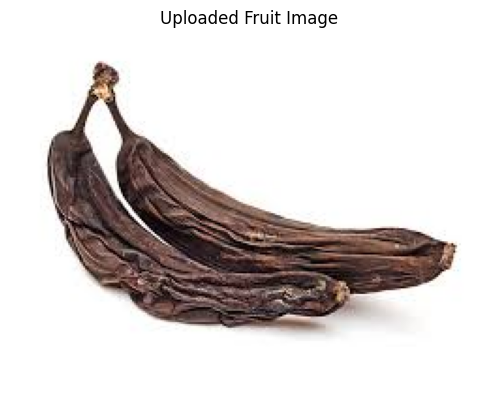

Fruit: Banana
Condition: Rotten
Estimated Shelf Life: 0 days
Recommendation: Remove from packaging line
Prediction Confidence: 100.00%



In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and show the image
img = Image.open("ban.jpg")
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Fruit Image")
plt.show()

# 🔮 Predict the fruit (this will trigger the output print statements)
predict_fruit("ban.jpg")
